# IRIS DATASET

## 1. Problem:
You are provided with Iris plants dataset. The Iris plants dataset is a classic and very easy `multi-class classification` dataset.<br>

### Data Characteristics
1. `Number of Instances`: 150 (50 in each of three classes).
2. `Number of Attributes`: 4 numeric, predictive attributes and the class.
3. `Features`: sepal length in cm, sepal width in cm, petal length in cm, petal width in cm.
4. `Class`: Iris-Setosa, Iris-Versicolour, Iris-Virginica
5. `Class Distribution`: 33.3% for each of 3 classes.
6. `Creator`: R.A. Fisher.
7. `Donor`: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov).
8. `Date`: July, 1988.

<img src="https://editor.analyticsvidhya.com/uploads/51518iris%20img1.png" width="800px"/>

### Question
1. Analyze and visualize the datasets
2. Build a simple machine learning model to classify a iris species

## 2. Solution
### Overall solution
A simple machine learning solution can be splitted into 3 steps:
- Step 1: Prepare data and do the EDA
- Step 2: Build and train a machine learning model
- Step 3: Run the machine learning model with new data

### Step 0: Install and import library
Install sklearn by running this command in jupyter notebook: 
`!conda install -c anaconda scikit-learn -y`

In [1]:
# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# `sklearn` library used to train and eval model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# `joblib` used to save and load trained model
from joblib import dump, load

### Step 1: Prepare, analyze, and visualize dataset
#### Step 1.1: Prepare Iris dataset

In [2]:
iris_df = sns.load_dataset('iris')
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


#### Step 1.2: EDA (Exploratory Data Analysis)

In [3]:
# Check null value in the data, the datatype, the size of data
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# Another way to check null value in the data
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
# Number of labels in the dataset and number of samples each label
species_count = iris_df.species.value_counts()
species_count

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

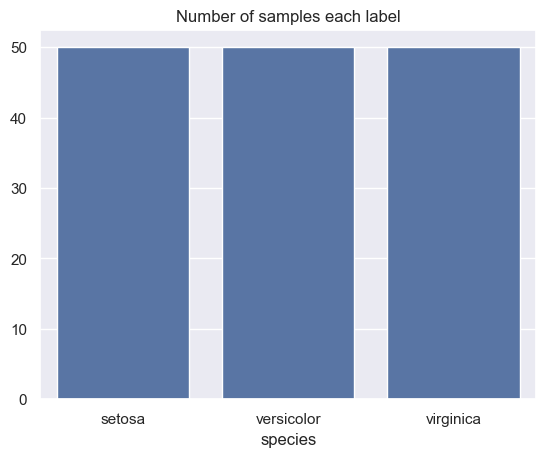

In [6]:
# Plot the barplot
sns.barplot(x=species_count.index, y=species_count.values)
plt.title('Number of samples each label')
plt.show()

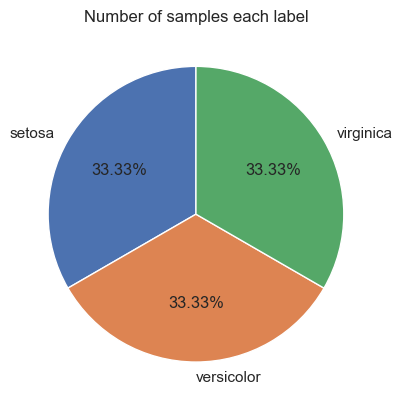

In [7]:
# Plot the pieplot
plt.pie(species_count.values, labels=species_count.index, startangle=90, autopct='%.2f%%')
plt.title('Number of samples each label')
plt.show()

In [8]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


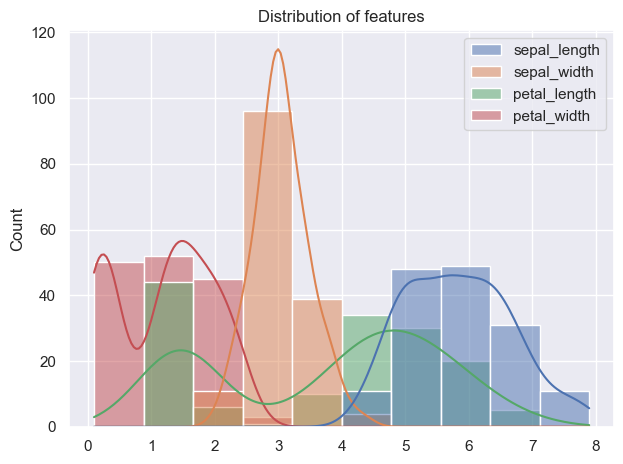

In [9]:
# Plot the distribution of each feature
sns.histplot(data=iris_df, bins=10, kde=True)
plt.title('Distribution of features')
plt.tight_layout()
plt.show()

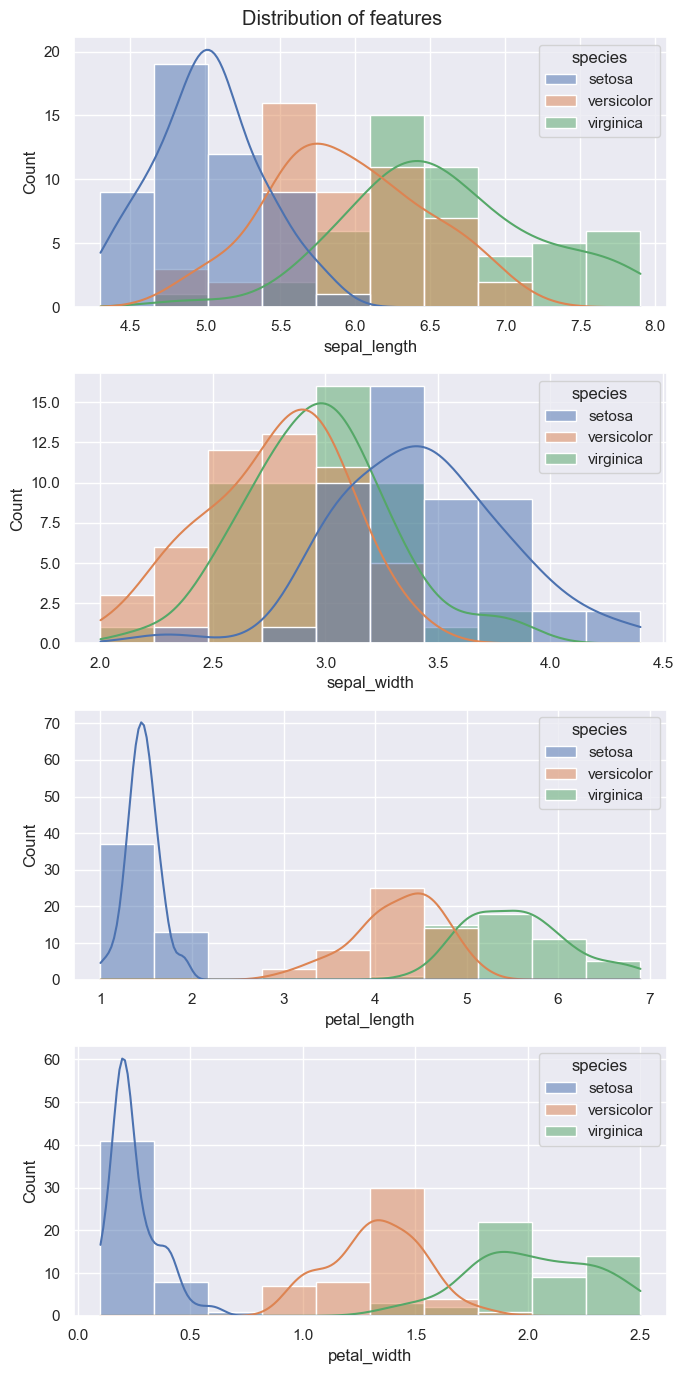

In [10]:
# Plot the distribution of each feature
feature_list = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
fig, ax = plt.subplots(4, 1, figsize=(7, 14))

for index, feature in enumerate(feature_list):
    sns.histplot(ax=ax[index], x=feature, data=iris_df, bins=10, kde=True, hue='species')

plt.suptitle('Distribution of features')
plt.tight_layout()
plt.show()

In [11]:
# Statistics of each features
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


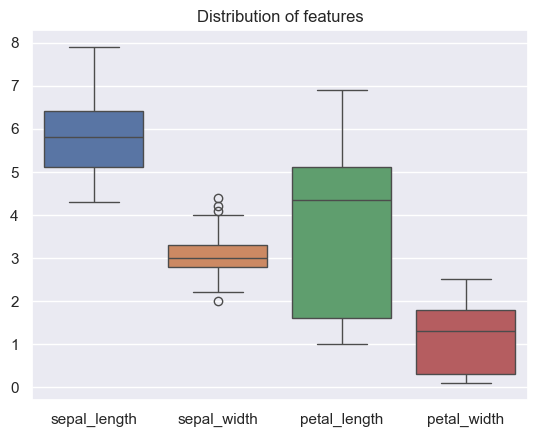

In [12]:
# Plot statistics of each features
sns.boxplot(data=iris_df) 
plt.title('Distribution of features')
plt.show()

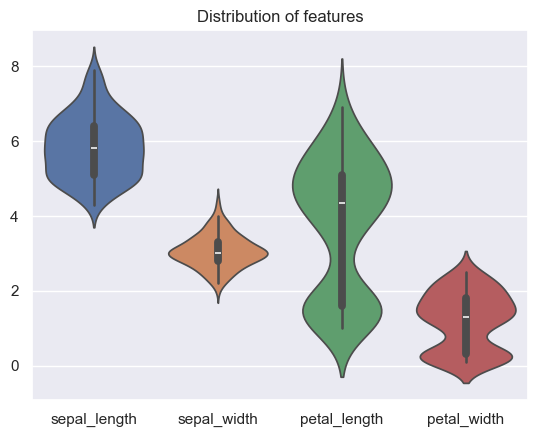

In [13]:
# Plot statistics of each features
sns.violinplot(data=iris_df) 
plt.title('Distribution of features')
plt.show()

### Step 2: Build and train a machine learning model
#### Step 2.1: Split data into train and test

In [14]:
x_data = iris_df.drop('species', axis=1)
x_data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
y_data = iris_df.species
y_data

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [16]:
# Split data into train set and test set
x_train, x_test, y_train, y_test = train_test_split(
    x_data,
    y_data,
    test_size=0.2,
    random_state=1
)

In [17]:
x_train.shape, y_train.shape

((120, 4), (120,))

In [18]:
x_test.shape, y_test.shape

((30, 4), (30,))

#### Step 2.2: Train model
Detail of parameters used in LogisticRegression can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

In [19]:
# Create a logicstic regression model
model = LogisticRegression(max_iter=1000)

In [20]:
# Fit model with train set
model.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [21]:
# Show model classes
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [22]:
# Predict the test set
y_pred = model.predict(x_test)
y_pred

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica'],
      dtype=object)

In [23]:
# Predict the probability of the test set
y_pred_proba = model.predict_proba(x_test)
y_pred_proba

array([[9.84756269e-01, 1.52437092e-02, 2.17858121e-08],
       [2.75596806e-01, 7.21752015e-01, 2.65117843e-03],
       [6.27871377e-03, 8.89174399e-01, 1.04546888e-01],
       [9.85515808e-01, 1.44841283e-02, 6.34717913e-08],
       [1.18257137e-06, 1.90360675e-02, 9.80962750e-01],
       [4.51922085e-03, 6.27794752e-01, 3.67686028e-01],
       [1.46837201e-04, 1.27712655e-01, 8.72140508e-01],
       [9.57803825e-01, 4.21949450e-02, 1.23048351e-06],
       [9.69557702e-01, 3.04419886e-02, 3.09847962e-07],
       [9.74114606e-06, 2.70716256e-02, 9.72918633e-01],
       [1.89492017e-02, 8.79762155e-01, 1.01288643e-01],
       [9.66499509e-01, 3.35000481e-02, 4.43184826e-07],
       [4.71858146e-06, 3.10386430e-02, 9.68956638e-01],
       [7.13942428e-03, 8.01769503e-01, 1.91091073e-01],
       [6.96703422e-03, 7.49154128e-01, 2.43878838e-01],
       [9.88096996e-01, 1.19029367e-02, 6.73325283e-08],
       [2.24807223e-02, 9.37011001e-01, 4.05082765e-02],
       [1.09319188e-02, 6.81855

#### Step 2.3: Evaluate the model

In [24]:
accuracy_score(y_test, y_pred)

0.9666666666666667

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [26]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

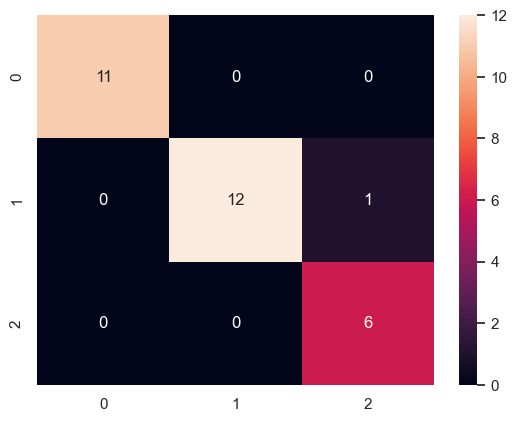

In [27]:
sns.heatmap(cm, annot=True)
plt.show()

### Step 3: Run the machine learning model with new data

In [28]:
# Save model to file
dump(model, 'model.joblib')

['model.joblib']

In [29]:
# Load model from file
loaded_model = load('model.joblib')

In [30]:
# Check loaded model
y_pred = loaded_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.9666666666666667

In [31]:
def classify_iris(sepal_length, sepal_width, petal_length, petal_width, model):
    input_data = np.array(
        [sepal_length, sepal_width, petal_length, petal_width], dtype=np.float64)
    input_data = np.expand_dims(input_data, axis=0)
    prediction = model.predict(input_data)
    return prediction

In [32]:
classify_iris('1', 2, 3, 4, loaded_model)

/Users/minhhuunguyen/REPOSITORY/minhhuunguyen.github.io/posts/ai-lectures/venv/common_venv/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['virginica'], dtype=object)